### Importing libraries

In [93]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# seaborn for statistical data visualization
import seaborn as sns

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import linear_kernel
from sklearn import metrics

# for numeric calculations
import numpy as np
from scipy.sparse import coo_matrix

#for saving files
import os

## 1) Loading data

### Movies

In [94]:
movies = pd.read_csv('./ml-latest-small/movies.csv', index_col=None, na_values=['NA'])

In [95]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
movies.shape

(9742, 3)

In [97]:
movies['movieId'].max()

193609

### Ratings

In [98]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', index_col=None, na_values=['NA'])

In [99]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [100]:
ratings.shape

(100836, 4)

## 2) Aggregating data

In [101]:
mvrt = pd.merge(ratings, movies, on='movieId')

In [102]:
mvrt.sample(20)

,userId,movieId,rating,timestamp,title,genres
100269,599,55061,1.0,1498531554,Electroma (2006),Drama|Sci-Fi
46979,45,50872,5.0,1193288853,Ratatouille (2007),Animation|Children|Drama
2203,372,316,5.0,874416615,Stargate (1994),Action|Adventure|Sci-Fi
18635,477,2424,4.0,1200941338,You've Got Mail (1998),Comedy|Romance
87575,414,27873,3.5,1126758881,Metallica: Some Kind of Monster (2004),Documentary
85781,608,5065,4.0,1117506631,"Mothman Prophecies, The (2002)",Drama|Fantasy|Horror|Mystery|Thriller
74886,590,805,3.5,1258421509,"Time to Kill, A (1996)",Drama|Thriller
40340,274,5481,2.5,1173819620,Austin Powers in Goldmember (2002),Comedy
85817,448,5803,2.0,1087149734,I Spy (2002),Action|Adventure|Comedy|Crime
495,369,47,3.5,1237083091,Seven (a.k.a. Se7en) (1995),Mystery|Thriller


In [103]:
mvrt.shape

(100836, 6)

## 3) Cleaning data

We have loaded and aggregated the data we want to use. Next we will prepare by cleaning the data.

In [104]:
print("--- Missing values: ---")
print(mvrt.isnull().sum())

print("--- NaN values: -------")
print(mvrt.isna().sum())

--- Missing values: ---
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
--- NaN values: -------
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


We can see that there are no missing or NaN values.

In [105]:
all_genres = movies['genres'].str.split('|', expand=True).stack()
unique_genres_movies = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres_movies)

Number of occurrences for each genre:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


By looking at the number of occurrences for each genre, we can se there is 34 occurrences with no genres listed, we are going to remove movies without listed genres.

In [106]:
rows_with_no_genre = mvrt[mvrt['genres'] == '(no genres listed)']

In [107]:
rows_with_no_genre.movieId.value_counts()

movieId
122896    7
141866    3
142456    2
152037    2
166024    2
171495    2
172591    2
147250    1
171749    1
132084    1
181719    1
141131    1
156605    1
122888    1
174403    1
165489    1
182727    1
149330    1
143410    1
129250    1
167570    1
176601    1
172497    1
114335    1
169034    1
159779    1
181413    1
155589    1
171891    1
171631    1
159161    1
134861    1
173535    1
161008    1
Name: count, dtype: int64

In [108]:
mvrt = mvrt[~mvrt['movieId'].isin(rows_with_no_genre['movieId'])]
movies = movies[~movies['movieId'].isin(rows_with_no_genre['movieId'])]

Removing movies with no genres listed in both the movies and mvrt dataframes.

In [109]:
mvrt.shape

(100789, 6)

In [110]:
all_genres = movies['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama          4361
Comedy         3756
Thriller       1894
Action         1828
Romance        1596
Adventure      1263
Crime          1199
Sci-Fi          980
Horror          978
Fantasy         779
Children        664
Animation       611
Mystery         573
Documentary     440
War             382
Musical         334
Western         167
IMAX            158
Film-Noir        87
Name: count, dtype: int64


Now we can see that we have succesfully gotten rid of movies with no listed genres.

Let's remove year from the title of the movie and give it it's own column.

In [111]:
mvrt['year_released'] = mvrt['title'].str.extract(r'\((\d{4})\)', expand=False)
mvrt['title'] = mvrt['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

In [112]:
mvrt.head()

,userId,movieId,rating,timestamp,title,genres,year_released
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [113]:
mvrt.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
year_released    8
dtype: int64

We can see that 8 movies have no release year.

Checking what movies has no release year.

In [114]:
mvrt_movies_with_no_year = mvrt[mvrt['year_released'].isnull()]
mvrt_movies_with_no_year

,userId,movieId,rating,timestamp,title,genres,year_released
93457,209,140956,3.5,1524522239,Ready Player One,Action|Sci-Fi|Thriller,NaN
93458,305,140956,4.5,1533043577,Ready Player One,Action|Sci-Fi|Thriller,NaN
93459,380,140956,3.0,1534176158,Ready Player One,Action|Sci-Fi|Thriller,NaN
93460,514,140956,3.0,1533946119,Ready Player One,Action|Sci-Fi|Thriller,NaN
93476,210,40697,4.0,1527266191,Babylon 5,Sci-Fi,NaN
93477,528,40697,0.5,1391736467,Babylon 5,Sci-Fi,NaN
96413,306,149334,3.0,1518380372,Nocturnal Animals,Drama|Thriller,NaN
99001,462,162414,5.0,1478489531,Moonlight,Drama,NaN


We are adding the missing release years on our own.

In [115]:
#giving the movies with no release year the correct year.
mvrt.loc[mvrt['title'] == 'Ready Player One', 'year_released'] = 2018
mvrt.loc[mvrt['title'] == 'Babylon 5', 'year_released'] = 1994
mvrt.loc[mvrt['title'] == 'Nocturnal Animals', 'year_released'] = 2016
mvrt.loc[mvrt['title'] == 'Moonlight', 'year_released'] = 2016

In [116]:
#checking that movies with no year now is empty
mvrt_movies_with_no_year1 = mvrt[pd.isna(mvrt['year_released'])]
mvrt_movies_with_no_year1.shape

(0, 7)

In [117]:
mvrt.drop(columns=['timestamp'], inplace=True)

Dropping the timestamp columnn, since we are not planning on using it.

In [118]:
mvrt.sample(3)

,userId,movieId,rating,title,genres,year_released
92497,462,3925,1.5,Stranger Than Paradise,Comedy|Drama,1984
5703,590,923,4.0,Citizen Kane,Drama|Mystery,1941
22592,19,2186,4.0,Strangers on a Train,Crime|Drama|Film-Noir|Thriller,1951


In [119]:
mvrt.dtypes

userId             int64
movieId            int64
rating           float64
title             object
genres            object
year_released     object
dtype: object

Checking the type of data from each column.

In [120]:
mvrt['year_released'] = pd.to_numeric(mvrt['year_released'], errors='coerce')
mvrt.dtypes

userId             int64
movieId            int64
rating           float64
title             object
genres            object
year_released      int64
dtype: object

Changing year_released into an int, so we can use it for calculating and making graphs.

## 4) Exploring data

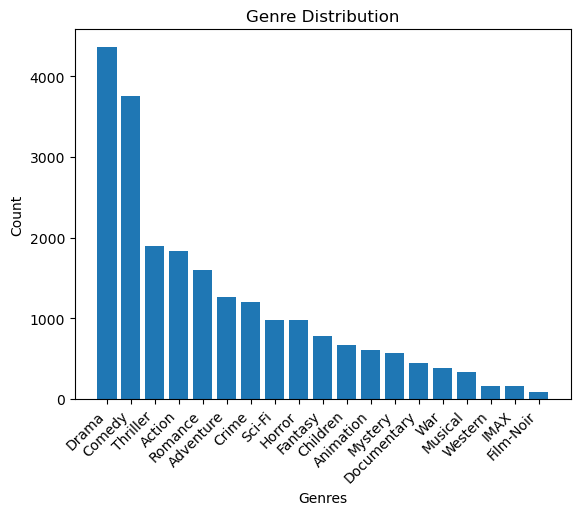

In [121]:
plt.bar(unique_genres.index, unique_genres)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

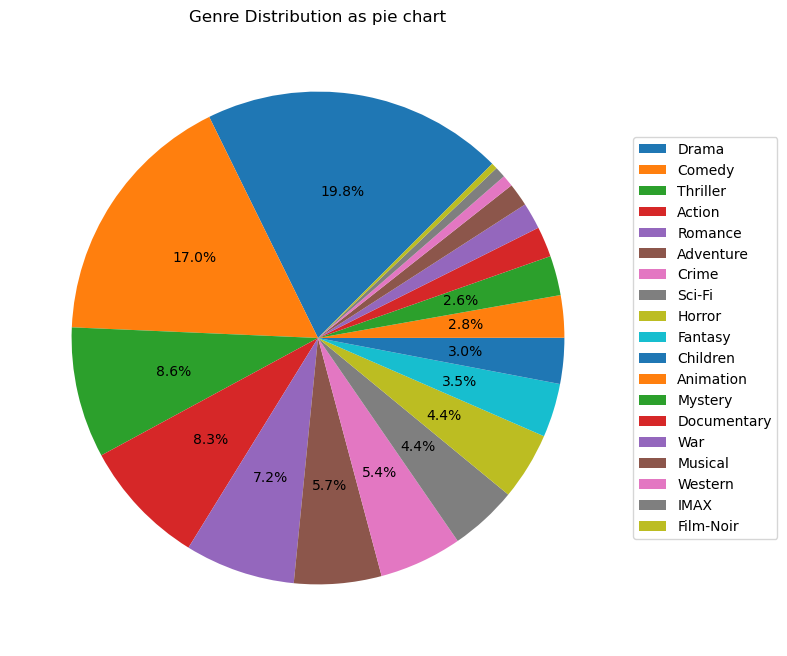

In [122]:
threshold = 2
filtered_genres = unique_genres[unique_genres >= threshold]
plt.figure(figsize=(10, 8))
patches, _, autotexts = plt.pie(filtered_genres, labels=None, autopct=lambda p: f'{p:.1f}%' if p >= threshold else '',
                                startangle=45, labeldistance=1.1)
plt.legend(patches, filtered_genres.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Genre Distribution as pie chart')
plt.show()

This is the distribution of the genres in the dataset. Viewed first as a histogram with numbers, and now as a pie chart with percentages. The most common genre is Drama, followed by Comedy and Thriller.

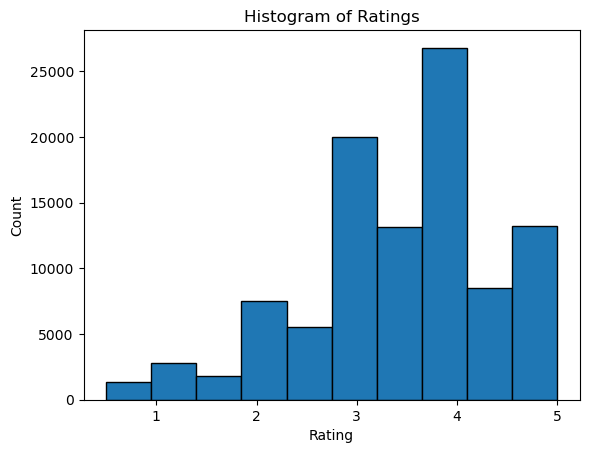

In [123]:
plt.hist(mvrt['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

Here we can see that the most common rating is 4.0, and the least common is 0.5.

In [124]:
genres_list = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
               'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror',
               'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir']

In [125]:
def average_rating_by_genre(data, genre_list):

    genres_expanded = data['genres'].str.get_dummies(sep='|')
    
    data_genres = pd.concat([data, genres_expanded], axis=1)
    
    average_ratings = {}
    for genre in genre_list:
        if genre in data_genres.columns:
            average_rating = data_genres[data_genres[genre] == 1]['rating'].mean()
            average_ratings[genre] = average_rating

    return average_ratings

In the function average_rating_by_genre, we use one-hot to encode the genres, and then merge with the previous dataframe. Then we calcuate the average rating for each genre.

In [126]:
result = average_rating_by_genre(mvrt,genres_list)
result

{'Drama': 3.6561844113718758,
 'Comedy': 3.3847207640898267,
 'Action': 3.447984331646809,
 'Thriller': 3.4937055799183425,
 'Adventure': 3.5086089151939075,
 'Romance': 3.5065107040388437,
 'Sci-Fi': 3.455721162210752,
 'Crime': 3.658293867274144,
 'Fantasy': 3.4910005070136894,
 'Children': 3.412956125108601,
 'Mystery': 3.632460255407871,
 'Horror': 3.258195034974626,
 'Animation': 3.6299370349170004,
 'War': 3.8082938876312,
 'IMAX': 3.618335343787696,
 'Musical': 3.5636781053649105,
 'Western': 3.583937823834197,
 'Documentary': 3.797785069729286,
 'Film-Noir': 3.920114942528736}

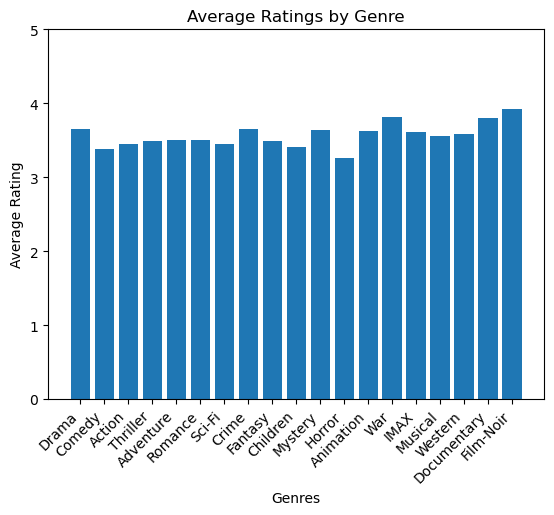

In [127]:
plt.bar(result.keys(), result.values())
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.ylim(0, 5)  
plt.xticks(rotation=45, ha='right')  
plt.show()

Here we have the average rating for each genre. The highest average rating is for Film-Noir and the lowest is for Horror.
The reason for this could be that we have so few film-noir movies to base our data on. 

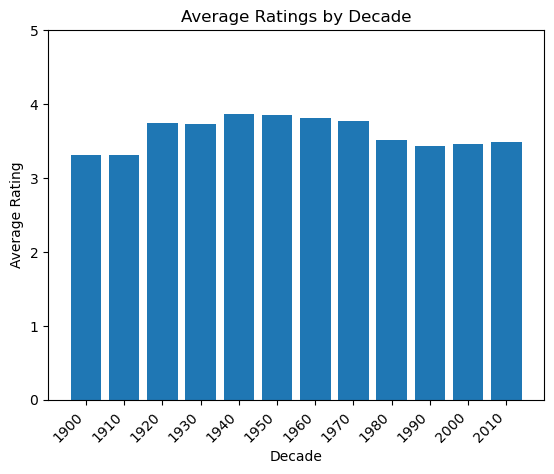

In [128]:
mvrt['decade'] = (mvrt['year_released'] // 10) * 10
average_ratings_by_decade = mvrt.groupby('decade')['rating'].mean()
plt.bar(average_ratings_by_decade.index.astype(str), average_ratings_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.ylim(0, 5) 
plt.title('Average Ratings by Decade')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that the best movies were made in the 1940's and 1950's. 

In [129]:
vote_counts = mvrt['movieId'].value_counts().reset_index()
vote_counts.columns = ['movieId', 'vote_count']
mvrt = pd.merge(mvrt, vote_counts, on='movieId', how='left', suffixes=('_original', '_count'))
mvrt.head()

,userId,movieId,rating,title,genres,year_released,decade,vote_count
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990,215
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990,215
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990,215
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990,215
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1990,215


Counting how many ratings each movie has, and adding it to the mvrt dataframe.

In [130]:
merged_movies = pd.merge(movies, vote_counts, on='movieId', how='left')

We are merging movies with vote_count so we only get each movie once for calculating the quantile.

In [131]:
merged_movies

,movieId,title,genres,vote_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9703,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9704,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9705,193585,Flint (2017),Drama,1.0
9706,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


In [132]:
merged_movies['year_released'] = merged_movies['title'].str.extract(r'\((\d{4})\)', expand=False)
merged_movies['title'] = merged_movies['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)
movies['year_released'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

Adding the year to the movies dataframe.

In [133]:
movies['year_released'] = pd.to_numeric(movies['year_released'], errors='coerce').astype('Int64')
movies.dtypes

movieId           int64
title            object
genres           object
year_released     Int64
dtype: object

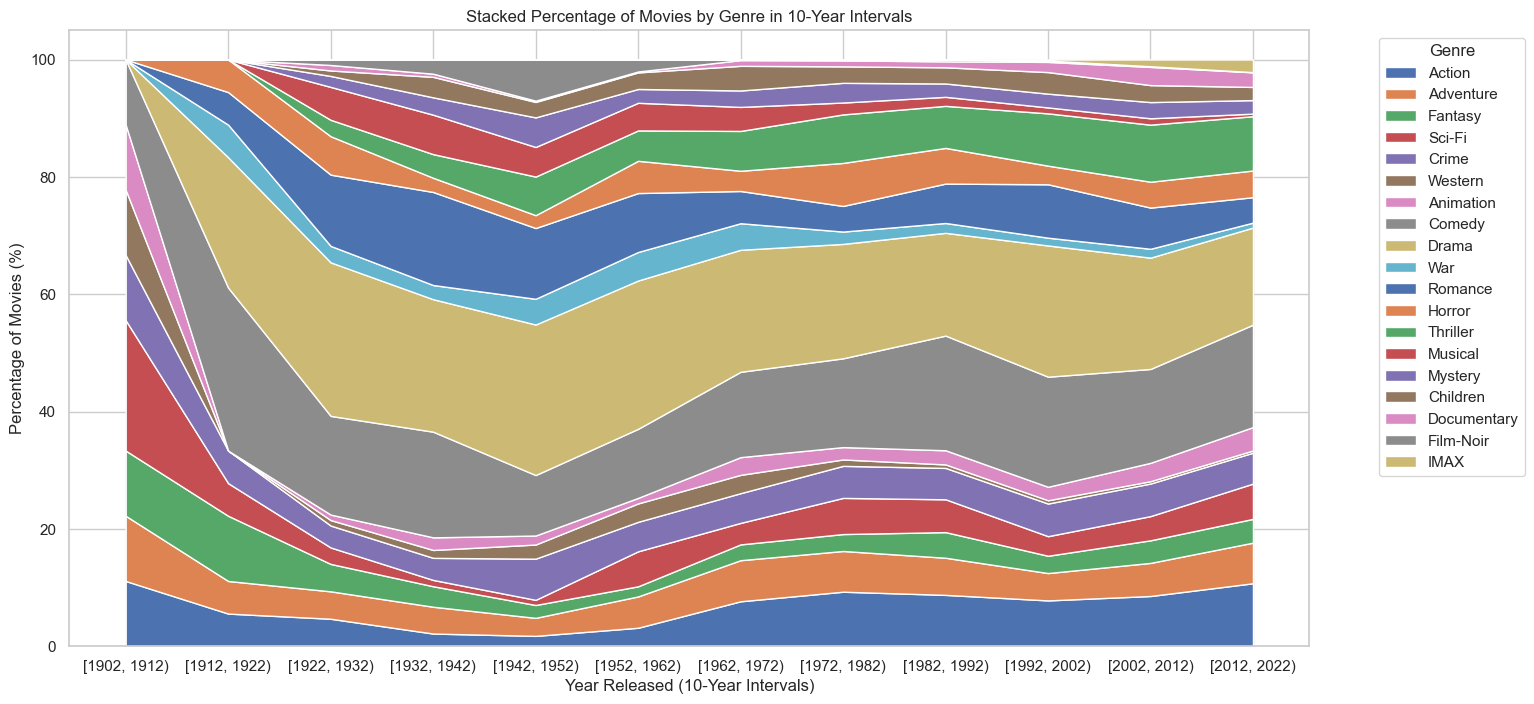

In [134]:
def stackplot_genres_per_10year(df, saving=False, filename=None):
    sns.set(style="whitegrid")
    df = df.sort_values("year_released")

    df = df[df["year_released"].notna()]

    #Create a range of 10-year intervals
    year_intervals = pd.cut(df["year_released"], bins=range(df["year_released"].min(), df["year_released"].max() + 11, 10), right=False)

    counts = []
    genres = df["genres"].str.split("|").explode().unique()

    for genre in genres:
        #Use observed=False to suppress the FutureWarning
        genre_counts = df[df["genres"].str.contains(fr'\b{genre}\b', na=False)].groupby(year_intervals, observed=False).size()     
        counts.append(genre_counts)

    counts_df = pd.concat(counts, axis=1, keys=genres).fillna(0)
    
    #Normalize the counts to get percentages
    counts_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

    #Create a stackplot
    f, ax = plt.subplots(figsize=(16, 8))
    plt.stackplot(counts_df.index.astype(str), counts_df.T, labels=genres)
    
    plt.xlabel("Year Released (10-Year Intervals)")
    plt.ylabel("Percentage of Movies (%)")
    plt.title("Stacked Percentage of Movies by Genre in 10-Year Intervals")
    plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')  #Move legend outside the plot

    if saving:
        plt.savefig(filename, dpi=200, bbox_inches="tight")

    plt.show()

stackplot_genres_per_10year(movies, saving=False, filename=None)

Creating a stackplot to show the percentages of what genres came out in what year. 

In [135]:
m = merged_movies['vote_count'].quantile(0.90)
print(m)

27.0


Calculating the 90th percentile.

We just wanna keep the movies with more than m (27) votes, in a new dataframe called q_movies.

In [136]:
q_movies = merged_movies.copy().loc[merged_movies['vote_count'] >= m]
q_movies = q_movies.reset_index(drop=True)
q_movies

,movieId,title,genres,vote_count,year_released
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,215.0,1995
1,2,Jumanji,Adventure|Children|Fantasy,110.0,1995
2,3,Grumpier Old Men,Comedy|Romance,52.0,1995
3,5,Father of the Bride Part II,Comedy,49.0,1995
4,6,Heat,Action|Crime|Thriller,102.0,1995
...,...,...,...,...,...
971,134130,The Martian,Adventure|Drama|Sci-Fi,48.0,2015
972,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,2015
973,139385,The Revenant,Adventure|Drama,31.0,2015
974,152081,Zootopia,Action|Adventure|Animation|Children|Comedy,32.0,2016


And then we are resetting the index to easier read the dataframe.

In [137]:
average_ratings = mvrt.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

movies_average = pd.merge(merged_movies, average_ratings, on='movieId', how='left')
movies_average

,movieId,title,genres,vote_count,year_released,average_rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,215.0,1995,3.920930
1,2,Jumanji,Adventure|Children|Fantasy,110.0,1995,3.431818
2,3,Grumpier Old Men,Comedy|Romance,52.0,1995,3.259615
3,4,Waiting to Exhale,Comedy|Drama|Romance,7.0,1995,2.357143
4,5,Father of the Bride Part II,Comedy,49.0,1995,3.071429
...,...,...,...,...,...,...
9703,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,1.0,2017,4.000000
9704,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,1.0,2017,3.500000
9705,193585,Flint,Drama,1.0,2017,3.500000
9706,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,1.0,2018,3.500000


We are calculating the average rating for each movie, and after that we are merging the merged_movies with average_ratings.

In [138]:
average_rating_of_all = movies_average['average_rating'].mean()
print(average_rating_of_all)

3.2620668706545675


We are calculating to see the average of all ratings.

In [139]:
q_movies = movies_average.copy().loc[merged_movies['vote_count'] >= m]
q_movies

,movieId,title,genres,vote_count,year_released,average_rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,215.0,1995,3.920930
1,2,Jumanji,Adventure|Children|Fantasy,110.0,1995,3.431818
2,3,Grumpier Old Men,Comedy|Romance,52.0,1995,3.259615
4,5,Father of the Bride Part II,Comedy,49.0,1995,3.071429
5,6,Heat,Action|Crime|Thriller,102.0,1995,3.946078
...,...,...,...,...,...,...
8874,134130,The Martian,Adventure|Drama|Sci-Fi,48.0,2015,4.000000
8895,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,2015,3.813953
8984,139385,The Revenant,Adventure|Drama,31.0,2015,3.903226
9210,152081,Zootopia,Action|Adventure|Animation|Children|Comedy,32.0,2016,3.890625


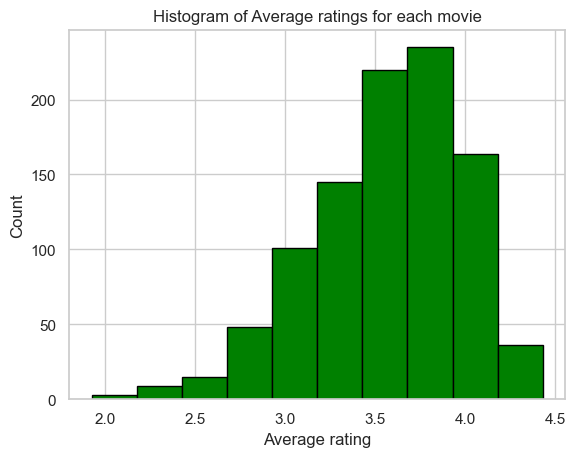

In [140]:
plt.hist(q_movies['average_rating'], bins=10, edgecolor='black', color='green')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.title('Histogram of Average ratings for each movie')
plt.show()

Creating a histogram of average rating for each movie and counts, to visualise it. Notice that its almost a normal distribution curve.

The histogram shows that most of the movies have an average rating between 3 and 4.5.

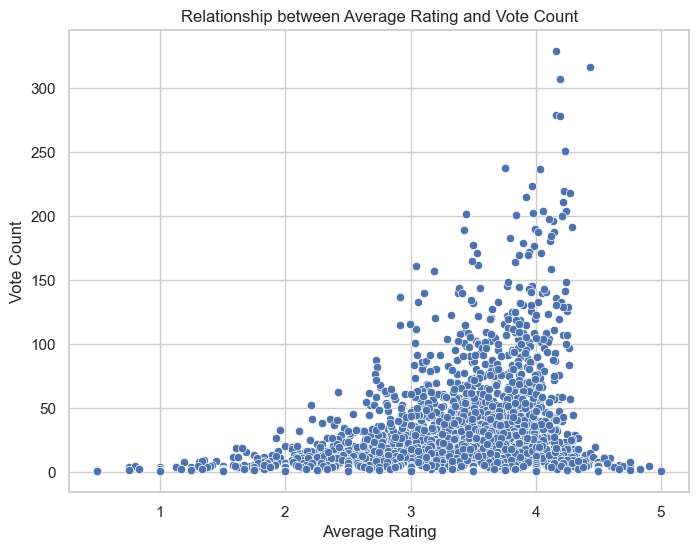

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_rating', y='vote_count', data=movies_average)
plt.title('Relationship between Average Rating and Vote Count')
plt.xlabel('Average Rating')
plt.ylabel('Vote Count')
plt.show()

This Scatterplot shows that movies that have an Average Rating in the extremities ie. 0-1 or close to 5 have very few votes and thus are not to be trusted.

# Content-based recommender

### Weighted average
Weighted average is used to give a more fair rating for each movie, by taking into consideration average rating of the movie (r), amount of ratings of the movie (v), average rating for all movies (c) and minimum amount of ratings required to be listed in the chart (m), which in our case is movies in the 90th percentile, which comes down to 27 ratings as we saw earlier.

In [142]:
def war(x, m=m, c=average_rating_of_all):
    v = x['vote_count']
    r = x['average_rating']
    return (v/(v+m) * r) + (m/(m+v) * c)

In [143]:
q_movies['score'] = movies_average.apply(war, axis=1)
print(q_movies['score'])

0       3.847421
1       3.398364
2       3.260453
4       3.139155
5       3.802913
          ...   
8874    3.734344
8895    3.601083
8984    3.604755
9210    3.602980
9413    3.593996
Name: score, Length: 976, dtype: float64


We are using the function on each of the movies and adding the scores to q_movies in a new column called score.

In [144]:
q_movies

,movieId,title,genres,vote_count,year_released,average_rating,score
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,215.0,1995,3.920930,3.847421
1,2,Jumanji,Adventure|Children|Fantasy,110.0,1995,3.431818,3.398364
2,3,Grumpier Old Men,Comedy|Romance,52.0,1995,3.259615,3.260453
4,5,Father of the Bride Part II,Comedy,49.0,1995,3.071429,3.139155
5,6,Heat,Action|Crime|Thriller,102.0,1995,3.946078,3.802913
...,...,...,...,...,...,...,...
8874,134130,The Martian,Adventure|Drama|Sci-Fi,48.0,2015,4.000000,3.734344
8895,134853,Inside Out,Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,2015,3.813953,3.601083
8984,139385,The Revenant,Adventure|Drama,31.0,2015,3.903226,3.604755
9210,152081,Zootopia,Action|Adventure|Animation|Children|Comedy,32.0,2016,3.890625,3.602980


Checking the data in q_movies.

In [145]:
current_directory = os.getcwd()
#q_movies.to_csv(current_directory + '/q_movies.csv', index=False)
#mvrt.to_csv(current_directory + '/year.csv', index=False)

Saving q_movies and mvrt in a csv file to use for Streamlit later.

In [146]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'average_rating', 'score']].head(15)

,title,vote_count,average_rating,score
277,"Shawshank Redemption, The",317.0,4.429022,4.337430
659,"Godfather, The",192.0,4.289062,4.162447
2226,Fight Club,218.0,4.272936,4.161534
224,Star Wars: Episode IV - A New Hope,251.0,4.231076,4.136963
46,"Usual Suspects, The",204.0,4.237745,4.123705
257,Pulp Fiction,307.0,4.197068,4.121484
461,Schindler's List,220.0,4.225000,4.119740
1939,"Matrix, The",278.0,4.192446,4.110085
898,Star Wars: Episode V - The Empire Strikes Back,211.0,4.215640,4.107461
314,Forrest Gump,329.0,4.164134,4.095719


Printed the top 15 movies, based on score.

In [147]:
movies['score'] = q_movies['score']
movies

,movieId,title,genres,year_released,score
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.847421
1,2,Jumanji,Adventure|Children|Fantasy,1995,3.398364
2,3,Grumpier Old Men,Comedy|Romance,1995,3.260453
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,NaN
4,5,Father of the Bride Part II,Comedy,1995,3.139155
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,NaN
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,NaN
9739,193585,Flint,Drama,2017,NaN
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,NaN


We add the scores to the movies dataframe.

In [148]:
tfidf = TfidfVectorizer(stop_words='english')

Initializing the vectorizer that we are going to use. 

In [149]:
movies['genres'] = movies['genres'].fillna('')
movies['score'] = movies['score'].fillna(0)

Filling everthing that is null or NaN.

In [150]:
movies[movies['title'] == 'Shawshank Redemption, The']

,movieId,title,genres,year_released,score
277,318,"Shawshank Redemption, The",Crime|Drama,1994,4.33743


In [151]:
#for streamlit
#¢unique_genres_moviest.to_csv(current_directory + '/unique_genres_movies.csv', index=False)

In [152]:
tfidf_matrix = tfidf.fit_transform(movies['genres'])

Converting the genres into vectors.

In [153]:
tfidf_matrix.shape

(9708, 21)

In [154]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9708, 9708)

In [155]:
print(cosine_sim)

[[1.         0.8136036  0.15259961 ... 0.         0.42114166 0.26738778]
 [0.8136036  1.         0.         ... 0.         0.         0.        ]
 [0.15259961 0.         1.         ... 0.         0.         0.57070525]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.42114166 0.         0.         ... 0.         1.         0.        ]
 [0.26738778 0.         0.57070525 ... 0.         0.         1.        ]]


See the cosine matrix. (Or some of it atleast).

In [156]:
indices = pd.Series(movies.index, index=movies['genres']).drop_duplicates()
indices

genres
Adventure|Animation|Children|Comedy|Fantasy       0
Adventure|Children|Fantasy                        1
Comedy|Romance                                    2
Comedy|Drama|Romance                              3
Comedy                                            4
                                               ... 
Action|Animation|Comedy|Fantasy                9737
Animation|Comedy|Fantasy                       9738
Drama                                          9739
Action|Animation                               9740
Comedy                                         9741
Length: 9708, dtype: int64

In [157]:
def get_recommendations(genre, cosine_sim=cosine_sim):
        # Get the indices of movies with the specified genre
        genre_list = genre.split('|')
        sorted_genre_list = sorted(genre_list)
        separator = '|'
        genre = separator.join(sorted_genre_list)
        genre_indices = indices[genre]

        # Initialize an empty list to store similarity scores
        sim_scores = []

        # Iterate over the genre indices and get the cosine similarity scores
        for idx in genre_indices:
            if idx < len(cosine_sim):
                sim_scores.extend(list(enumerate(cosine_sim[idx])))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:10]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        genre_list = genre.split('|')
        movies_with_score = movies[['title', 'genres', 'score']].iloc[movie_indices]
        sorted_genre_list = sorted(genre_list)
        filtered_movies = movies[(movies['score'] > 0) & movies['genres'].apply(lambda x: all(genre in x for genre in sorted_genre_list))]
        sorted_movies = filtered_movies.sort_values(by='score', ascending=False)
        return sorted_movies.drop_duplicates(subset='title').head(5)

Creating the function to create recommendations. 

In [158]:
get_recommendations('Film-Noir')

,movieId,title,genres,year_released,score
951,1252,Chinatown,Crime|Film-Noir|Mystery|Thriller,1974,3.913672
1218,1617,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller,1997,3.887708
695,913,"Maltese Falcon, The",Film-Noir|Mystery,1941,3.825011
704,922,Sunset Blvd. (a.k.a. Sunset Boulevard),Drama|Film-Noir|Romance,1950,3.797700
5850,32587,Sin City,Action|Crime|Film-Noir|Mystery|Thriller,2005,3.712395


In [159]:
get_recommendations('Drama|Action')

,movieId,title,genres,year_released,score
2226,2959,Fight Club,Action|Crime|Drama|Thriller,1999,4.161534
6710,58559,"Dark Knight, The",Action|Crime|Drama|IMAX,2008,4.088499
1503,2028,Saving Private Ryan,Action|Drama|War,1998,4.035236
909,1208,Apocalypse Now,Action|Drama|War,1979,4.026685
4800,7153,"Lord of the Rings: The Return of the King, The",Action|Adventure|Drama|Fantasy,2003,4.009792


In [160]:
get_recommendations('Comedy')

,movieId,title,genres,year_released,score
257,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,4.121484
314,356,Forrest Gump,Comedy|Drama|Romance|War,1994,4.095719
899,1197,"Princess Bride, The",Action|Adventure|Comedy|Fantasy|Romance,1987,4.077372
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1964,4.048998
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le)",Comedy|Romance,2001,4.014121


# Collaborative filtering recommender

### Preparing data, creating user-item matrix and splitting data into train/test

In [161]:
# Count the number of ratings per user
user_rating_counts = mvrt['userId'].value_counts()

# Filter out users with less than 25 ratings
valid_users = user_rating_counts[user_rating_counts >= 25].index

# Filter the original dataframe to keep only the ratings from valid users
mvrt_filtered = mvrt[mvrt['userId'].isin(valid_users)]

num_unique_users = mvrt_filtered['userId'].nunique()

print("Number of unique user IDs:", num_unique_users)

# Pivot the data to create a user-item matrix
user_movie_matrix = mvrt_filtered.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Convert the DataFrame to a numpy array
user_movie_array = user_movie_matrix.to_numpy()

# Split data into train and test
train_data, test_data = train_test_split(user_movie_array, test_size=0.3, random_state=42)

Number of unique user IDs: 547


## Cosine similarity

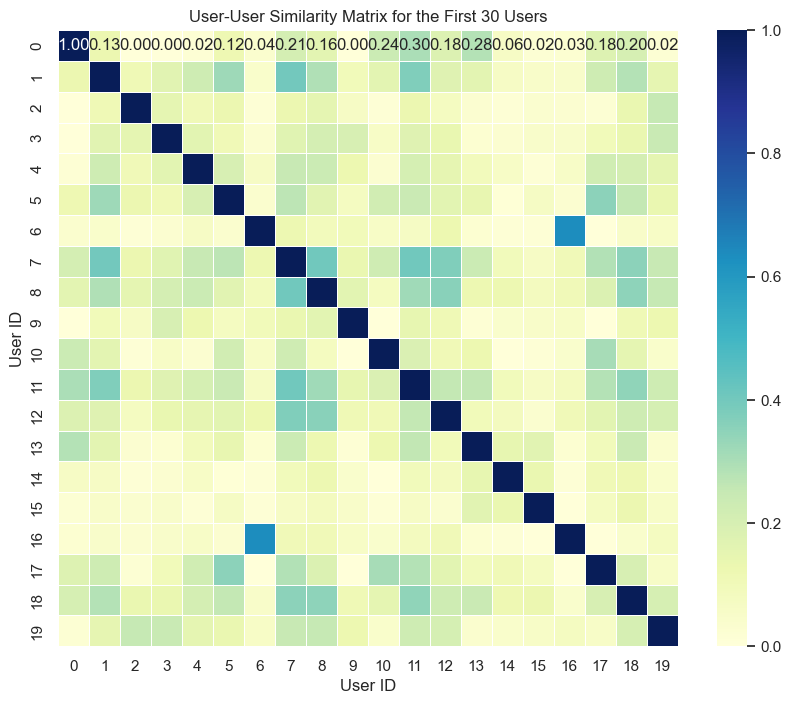

In [162]:
class CollaborativeFilteringRecommender:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.user_similarity = None

    def fit(self, train_data):
        # Compute user-user similarity matrix using cosine similarity
        self.user_similarity = cosine_similarity(train_data)

        plt.figure(figsize=(10, 8))
        subset_similarity_matrix = self.user_similarity[:20, :20]
        sns.heatmap(subset_similarity_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
        plt.xlabel("User ID")
        plt.ylabel("User ID")
        plt.title("User-User Similarity Matrix for the First 30 Users")
        plt.show()

    def predict(self, user_indices, train_data):
        # Compute weighted average of ratings from similar users for each user index
        recommendations = []
        for user_index in user_indices:
            user_sim_scores = self.user_similarity[user_index]
            top_sim_users = np.argsort(user_sim_scores)[-self.n_neighbors - 1:-1]  # Exclude the user itself

            user_ratings = train_data[top_sim_users, :]
            user_sim_scores = user_sim_scores[top_sim_users]

            # Weighted average of ratings from similar users
            pred_ratings = np.dot(user_sim_scores, user_ratings) / np.sum(user_sim_scores)
            recommendations.append(pred_ratings)

        return recommendations

# Instantiate the recommender system
recommender = CollaborativeFilteringRecommender(n_neighbors=50)

# Train the recommender system
recommender.fit(train_data)

# Make recommendations for specified user indices
user_indices = [8]
recommendations = recommender.predict(user_indices, train_data)

### Recommendations

In [163]:
for i, user_index in enumerate(user_indices):
    print(f"User {user_index}:")
    print("     Known positives:")
    known_positives = mvrt[(mvrt['userId'] == user_index) & (mvrt['rating'] > 4)].nlargest(3, 'rating')
    for _, row in known_positives.iterrows():
        print("             %s" % row['title'])
    
    print("     Recommended:")
    for item_index in recommendations[i].argsort()[-3:][::-1]:
        movie_id = mvrt['movieId'].unique()[item_index]
        movie_title = mvrt[mvrt['movieId'] == movie_id]['title'].iloc[0]
        pred_rating = recommendations[i][item_index]  # Predicted rating for the recommended movie
        print("             %s (Predicted Rating: %.2f)" % (movie_title, pred_rating))


User 8:
     Known positives:
             Usual Suspects, The
             Schindler's List
             Dances with Wolves
     Recommended:
             Winnie the Pooh and the Honey Tree (Predicted Rating: 4.20)
             Ex Machina (Predicted Rating: 4.18)
             Pride & Prejudice (Predicted Rating: 4.06)


### Evaluation

In [164]:
# Make predictions for the test set
test_predictions = recommender.predict(range(len(test_data)), train_data)

# Calculate mean squared error
mse = mean_squared_error(test_data, test_predictions)
print("Mean Squared Error:", mse)
# Calculate mean absolute error
mae = mean_absolute_error(test_data, test_predictions)
print("Mean Absolute Error:", mae)
# Calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(test_data, test_predictions))
print("Root Mean Squared Error:",rmse)


Mean Squared Error: 0.2791590012171851
Mean Absolute Error: 0.15100186400598403
Root Mean Squared Error: 0.528354995450204


Mean squared error (MSE) can be affected by movies that the user hasn't rated in the test set, since there's no ground truth to compare the predicted rating against. This is a common challenge in recommendation systems evaluation, known as the "cold start problem".

## SVD

In [165]:
class CollaborativeFilteringRecommender2:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.user_similarity = None

    def fit(self, train_data):
        # Perform Singular Value Decomposition
        u, s, vh = np.linalg.svd(train_data, full_matrices=False)

        # Compute user-user similarity matrix using cosine similarity
        self.user_similarity = np.zeros((train_data.shape[0], train_data.shape[0]))
        for i in range(train_data.shape[0]):
            for j in range(train_data.shape[0]):
                self.user_similarity[i, j] = np.dot(vh[i], vh[j]) / (np.linalg.norm(vh[i]) * np.linalg.norm(vh[j]))

    def predict(self, user_indices, train_data):
        # Compute weighted average of ratings from similar users for each user index
        recommendations = []
        for user_index in user_indices:
            user_sim_scores = self.user_similarity[user_index]
            top_sim_users = np.argsort(user_sim_scores)[-self.n_neighbors - 1:-1]  # Exclude the user itself

            user_ratings = train_data[top_sim_users, :]
            user_sim_scores = user_sim_scores[top_sim_users]

            # Weighted average of ratings from similar users
            pred_ratings = np.dot(user_sim_scores, user_ratings) / np.sum(user_sim_scores)
            recommendations.append(pred_ratings)

        return recommendations


# Instantiate the recommender system
recommender = CollaborativeFilteringRecommender2(n_neighbors=50)

# Train the recommender system
recommender.fit(train_data)

# Make recommendations for specified user indices
user_indices = [8]
recommendations = recommender.predict(user_indices, train_data)

### Recommendations

In [166]:
for i, user_index in enumerate(user_indices):
    print(f"User {user_index}:")
    print("     Known positives:")
    known_positives = mvrt[(mvrt['userId'] == user_index) & (mvrt['rating'] > 4)].nlargest(3, 'rating')
    for _, row in known_positives.iterrows():
        print("             %s" % row['title'])
    
    print("     Recommended:")
    for item_index in recommendations[i].argsort()[-3:][::-1]:
        movie_id = mvrt['movieId'].unique()[item_index]
        movie_title = mvrt[mvrt['movieId'] == movie_id]['title'].iloc[0]
        pred_rating = recommendations[i][item_index]  # Predicted rating for the recommended movie
        print("             %s (Predicted Rating: %.2f)" % (movie_title, pred_rating))


User 8:
     Known positives:
             Usual Suspects, The
             Schindler's List
             Dances with Wolves
     Recommended:
             Mad Max (Predicted Rating: 2.39)
             Four Weddings and a Funeral (Predicted Rating: 2.38)
             Winnie the Pooh and the Honey Tree (Predicted Rating: 2.36)


### Evaluation

In [167]:
# Make predictions for the test set
test_predictions = recommender.predict(range(len(test_data)), train_data)

# Calculate mean squared error
mse = metrics.mean_squared_error(test_data, test_predictions)
print("Mean Squared Error:", mse)
# Calculate mean absolute error
mae = metrics.mean_absolute_error(test_data, test_predictions)
print("Mean Absolute Error:", mae)

# Calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(test_data, test_predictions))
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 0.23418213337765983
Mean Absolute Error: 0.11969815918376428
Root Mean Squared Error: 0.48392368548941667
